* Put particles in results of TS3 and TS4 and explore the difference behaviors.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import datetime as dt
import pytz, datetime
import scipy.io
import arrow
import os
from salishsea_tools import nc_tools, viz_tools, tidetools, stormtools, bathy_tools
from matplotlib import reload
from __future__ import division

In [2]:
grid = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc','r')
bathy, X, Y = tidetools.get_bathy_data(grid)
lats = grid.variables['nav_lat']
lons = grid.variables['nav_lon']
bath = grid.variables['Bathymetry']

In [3]:
def plot_particle(lon,lat):
    fig, axs = plt.subplots(3, 3, figsize=(15, 12))
    for i in np.arange(3):
        for ax in axs[i,:]:
            viz_tools.plot_coastline(ax,grid,coords='map')
            viz_tools.plot_coastline(ax,grid,coords='map',isobath=4,color='FireBrick')
            viz_tools.plot_coastline(ax,grid,coords='map',isobath=20,color='OrangeRed')
            ax.set_xlim([-123.6,-123]); ax.set_ylim([48.8,49.4])
            ax.set_xticks([-123.6, -123.4, -123.2,-123])
            ax.set_xticklabels([-123.6, -123.4, -123.2,-123])
            ax.set_xlabel('Longitude'); ax.set_ylabel('Latitude')   
    colors=['DodgerBlue','DarkViolet']; 
    for key,color in zip(runs,colors):
        pa = 0
        for i in np.arange(3):
            for j in np.arange(3):
                axs[i,j].scatter(lon[key][0,pa],lat[key][0,pa],color='0.30',marker='s')
                axs[i,j].scatter(lon[key][1:,pa],lat[key][1:,pa],marker='o',color=color,label=key)
                axs[i,j].plot(-123-np.array([18.2,13.7,12])/60.,49+np.array([6.4,8,7.6])/60.,'-k',lw=2,color='Indigo')
                axs[i,j].legend(loc='best')
                pa = pa +1
    return fig

# Drop112

In [4]:
drop = 'drop1/12'
runs=['TS3','TS4']
base='/ocean/jieliu/research/meopar/Ariane/result/'
file_pattern = 'ariane_trajectories_qualitative.nc'
lon112 = {}; lat112={}
for run in runs:
    path = os.path.join(base,run, drop,file_pattern)
    f = nc.Dataset(path,'r');
    lon112[run] = f.variables['traj_lon']
    lat112[run] = f.variables['traj_lat']

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


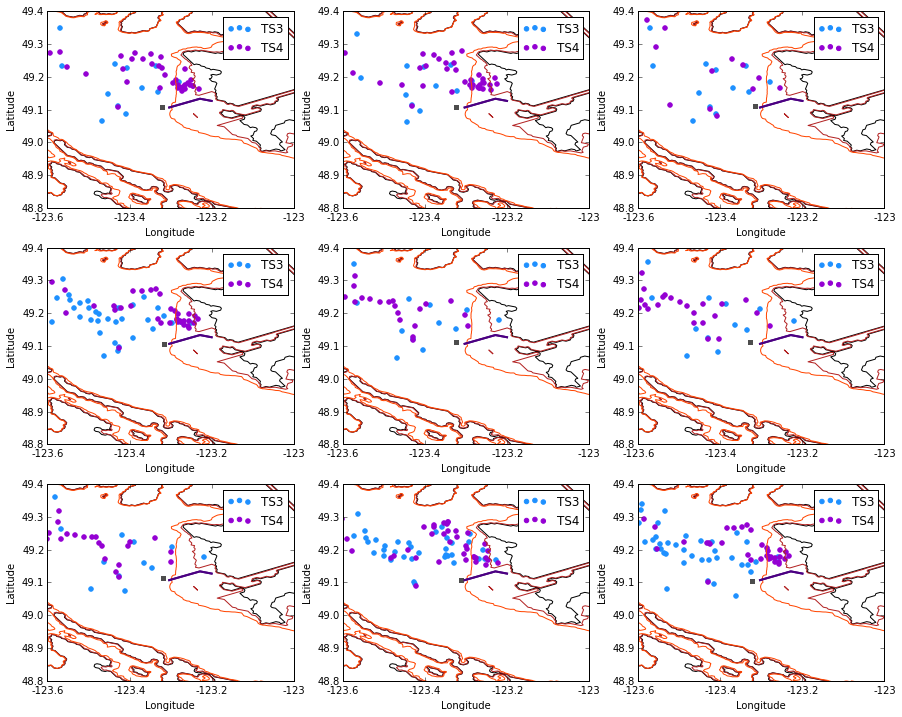

In [5]:
fig = plot_particle(lon112,lat112)